In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Load and investigate the data

In [2]:
tennis = pd.read_csv('tennis_stats.csv')

print(tennis.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [3]:
# Check column information
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [4]:
# Column general meaning
tennis.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


# Perform exploratory analysis

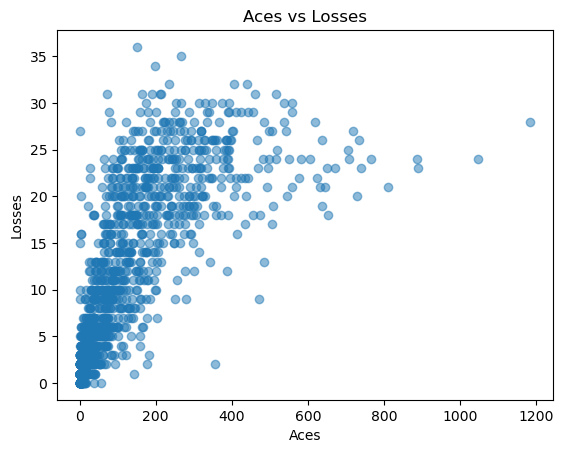

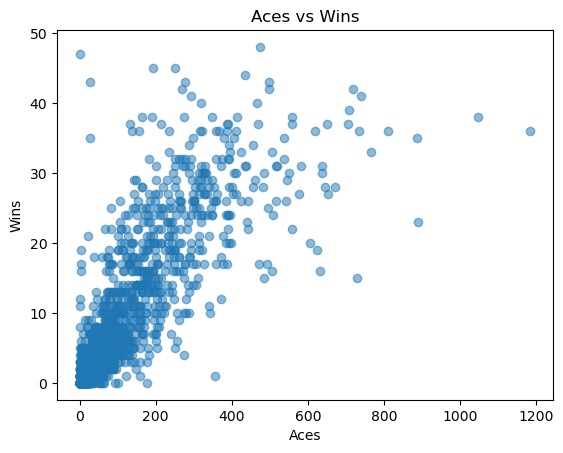

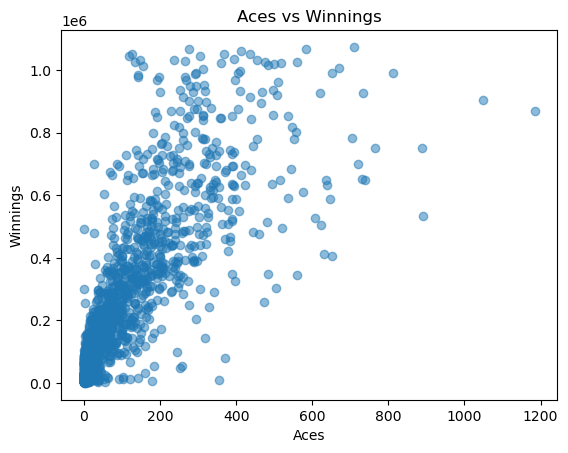

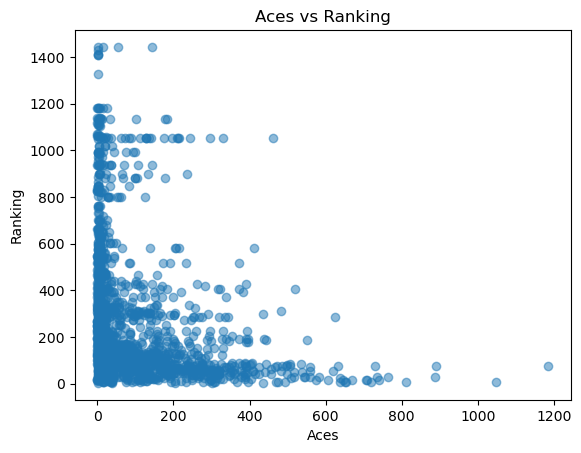

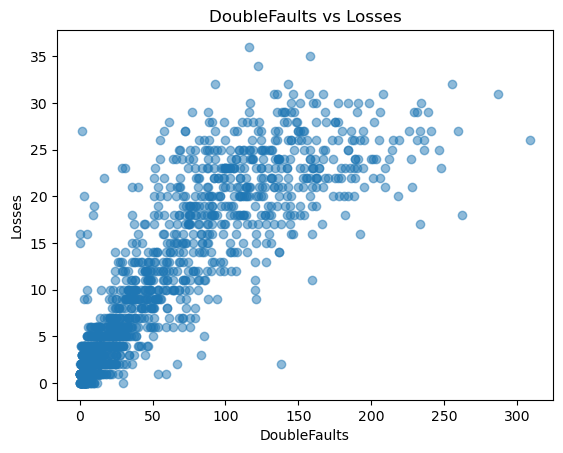

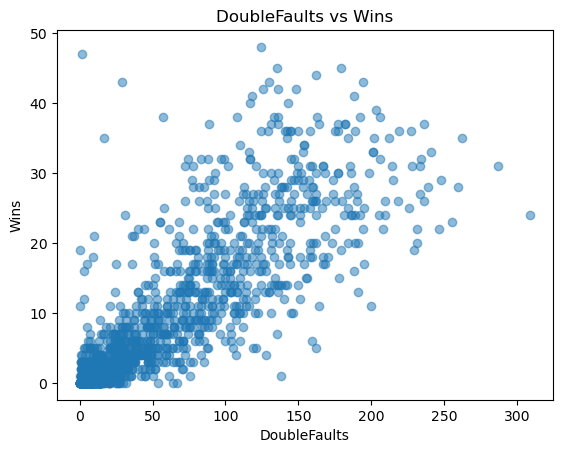

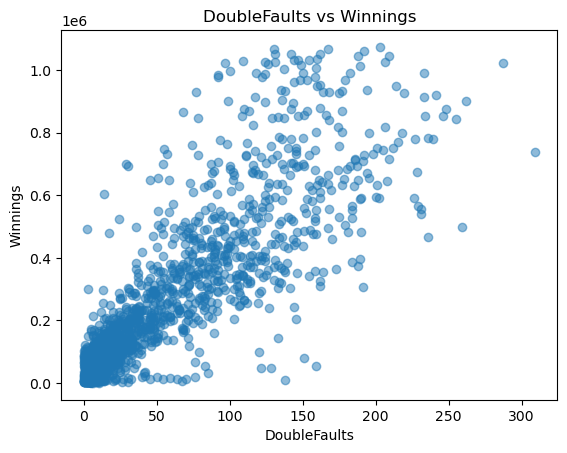

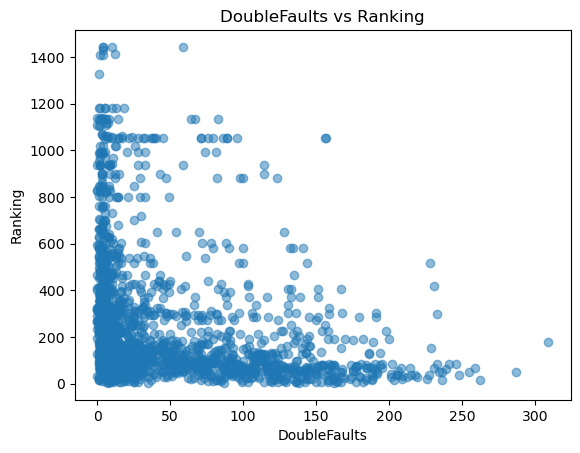

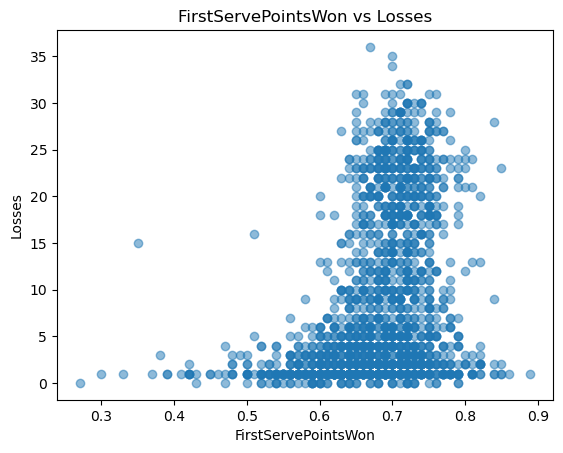

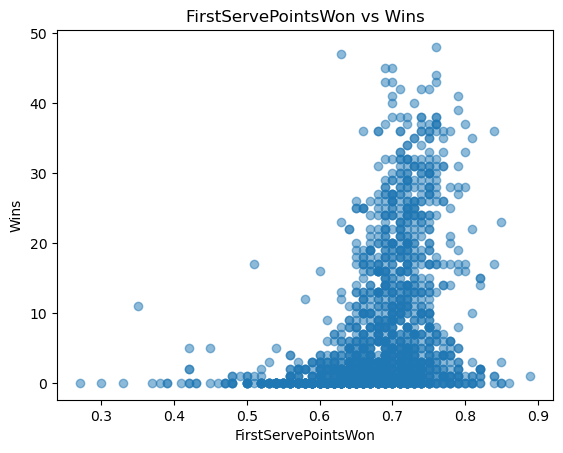

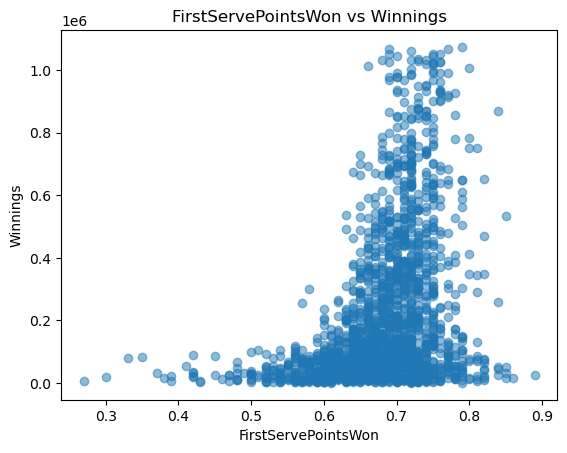

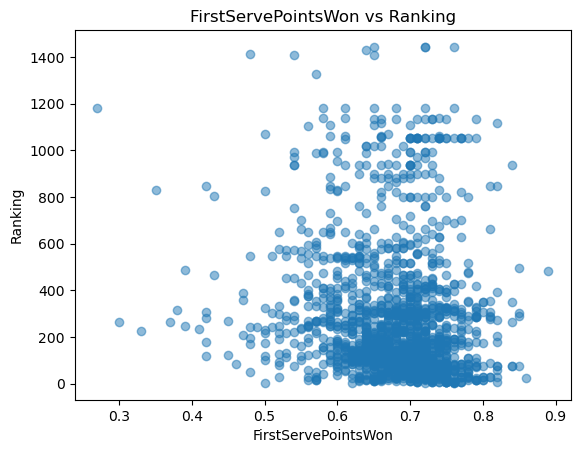

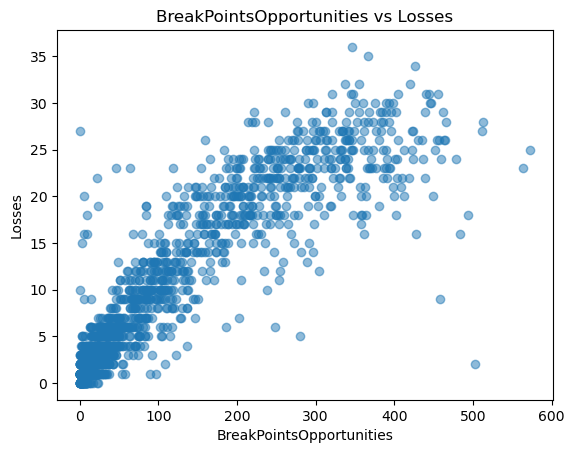

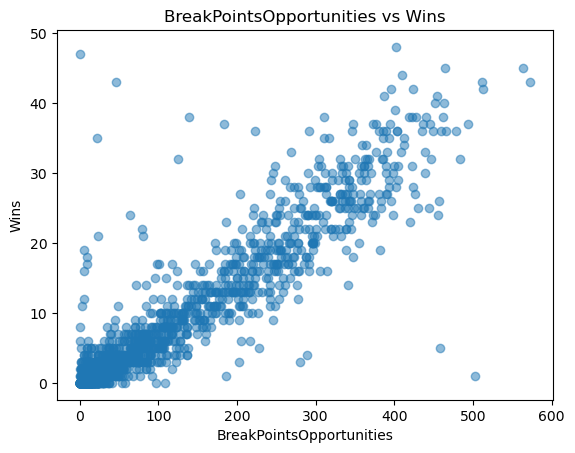

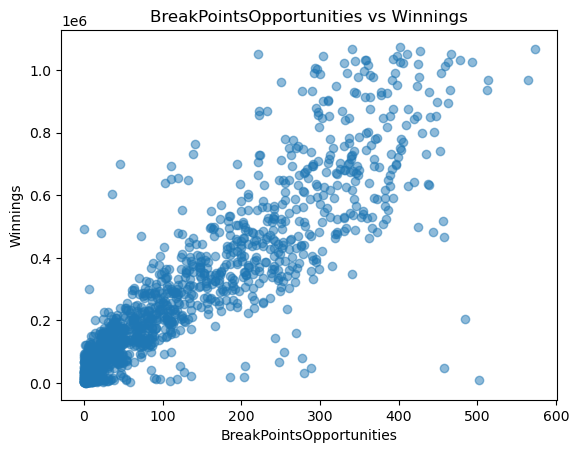

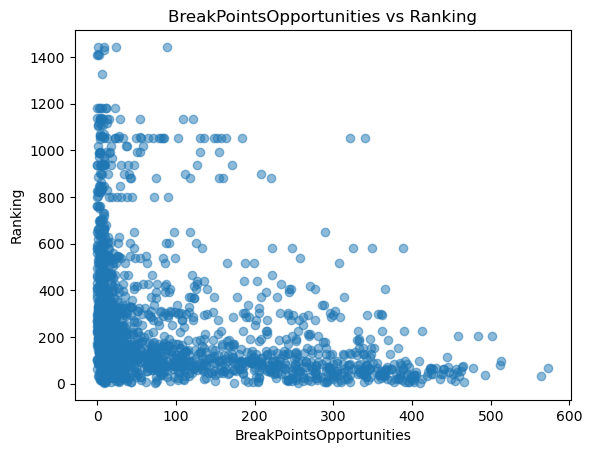

In [5]:
# Example features and outcomes
features = ['Aces', 'DoubleFaults', 'FirstServePointsWon','BreakPointsOpportunities']
outcomes = ['Losses', 'Wins', 'Winnings', 'Ranking']

# Plot each feature against each outcome
for feature in features:
    for outcome in outcomes:
        plt.figure()
        plt.scatter(tennis[feature], tennis[outcome], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(outcome)
        plt.title(f'{feature} vs {outcome}')
        plt.show()


## Perform single feature linear regressions

Model R^2 Score: 0.043583433108363545


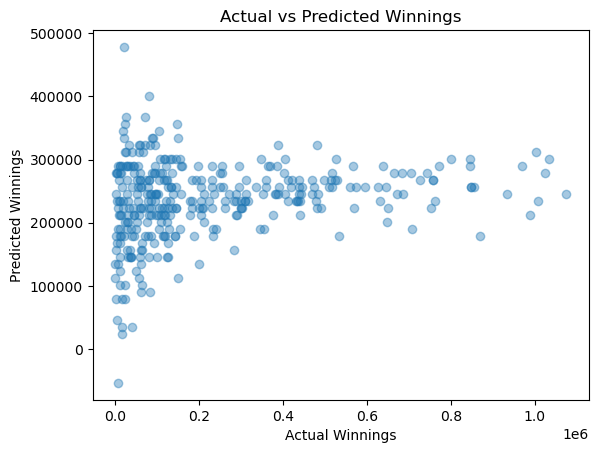

In [6]:
# Choose a feature and an outcome
feature = 'FirstServeReturnPointsWon'
outcome = 'Winnings'

# Prepare the data
X = tennis[[feature]]
y = tennis[outcome]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs actual outcomes
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings')
plt.show()


Model R^2 Score: 0.7865551696389493


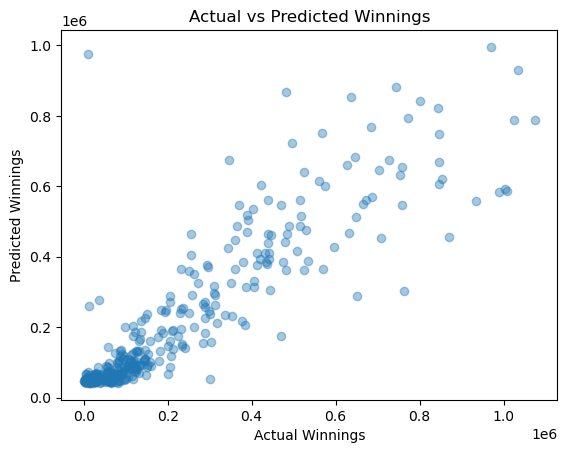

In [7]:
# Choose a feature and an outcome
feature = 'BreakPointsOpportunities'
outcome = 'Winnings'

# Prepare the data
X = tennis[[feature]]
y = tennis[outcome]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs actual outcomes
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings')
plt.show()

## Perform two feature linear regressions

In [12]:
# List of feature pairs to test
feature_pairs = [
    ('Aces', 'DoubleFaults'),
    ('FirstServePointsWon', 'BreakPointsOpportunities'),
    ('FirstServeReturnPointsWon', 'SecondServeReturnPointsWon'),
    ('ServiceGamesWon', 'ReturnGamesWon')
]
outcome = 'Winnings'

# Dictionary to store R² scores
scores = {}

# Loop through each pair of features
for features in feature_pairs:
    # Prepare the data
    X = tennis[list(features)]
    y = tennis[outcome]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    scores[features] = score
    print(f"Model using {features} - R^2 Score: {score}")

# Determine the best model
best_features = max(scores, key=scores.get)
print(f"The best model uses the features: {best_features} with an R^2 score of {scores[best_features]}")


Model using ('Aces', 'DoubleFaults') - R^2 Score: 0.7695325215843746
Model using ('FirstServePointsWon', 'BreakPointsOpportunities') - R^2 Score: 0.7954505672206647
Model using ('FirstServeReturnPointsWon', 'SecondServeReturnPointsWon') - R^2 Score: 0.06701195660524395
Model using ('ServiceGamesWon', 'ReturnGamesWon') - R^2 Score: 0.23605729776011597
The best model uses the features: ('FirstServePointsWon', 'BreakPointsOpportunities') with an R^2 score of 0.7954505672206647


## Perform multiple feature linear regressions

In [15]:
# List of feature sets to test
feature_sets = [
    ['Aces', 'DoubleFaults', 'FirstServePointsWon'],
    ['BreakPointsOpportunities', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon'],
    ['ServiceGamesWon', 'ReturnGamesWon', 'TotalPointsWon'],
    ['FirstServe', 'BreakPointsConverted', 'TotalServicePointsWon']
]
outcome = 'Winnings'

# Dictionary to store R² scores
scores = {}

# Loop through each set of features
for features in feature_sets:
    # Prepare the data
    X = tennis[features]
    y = tennis[outcome]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    scores[tuple(features)] = score
    print(f"Model using {features} - R^2 Score: {score}")

# Determine the best model
best_features = max(scores, key=scores.get)
print(f"The best model uses the features: {best_features} with an R^2 score of {scores[best_features]}")

Model using ['Aces', 'DoubleFaults', 'FirstServePointsWon'] - R^2 Score: 0.7690939554942338
Model using ['BreakPointsOpportunities', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon'] - R^2 Score: 0.7894227692288204
Model using ['ServiceGamesWon', 'ReturnGamesWon', 'TotalPointsWon'] - R^2 Score: 0.239187169737615
Model using ['FirstServe', 'BreakPointsConverted', 'TotalServicePointsWon'] - R^2 Score: 0.18436203777272975
The best model uses the features: ('BreakPointsOpportunities', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon') with an R^2 score of 0.7894227692288204
